In [1]:
import csv
import pandas as pd
import numpy as np 
import os
import nltk
import re
from nltk import word_tokenize


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df0 = pd.read_csv("/Users/yaminirege/Desktop/E2014.csv")
df1 = pd.read_csv("/Users/yaminirege/Desktop/2.2015.csv")
df2 = pd.read_csv("/Users/yaminirege/Desktop/3.2016.csv")
df3 = pd.read_csv("/Users/yaminirege/Desktop/4.2017.csv")
df4 = pd.read_csv("/Users/yaminirege/Desktop/5.2018.csv")
df5 = pd.read_csv("/Users/yaminirege/Desktop/6.2019.csv")
df6 = pd.read_csv("/Users/yaminirege/Desktop/7.2020.csv")

In [4]:
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,None,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,Student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,Training or a course on Corporate Communicatio...,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,None,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,None,"Communication skills, leadership, lead by exam..."


In [5]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [6]:
df0['Acad'].str.lower()

0                                                   none
1      student needs a strong role model to help him ...
2      training or a course on corporate communicatio...
3                                                   none
4                                                   none
                             ...                        
762                                                 none
763                                                 none
764                                                 none
765                               more writing practice.
766                                                 none
Name: Acad, Length: 767, dtype: object

In [7]:
df0['Acad'] = df0['Acad'].str.lower()

In [8]:
df0["Acad"] = df0['Acad'].str.replace('[^\w\s]','')


/var/folders/l5/9067kgk145b21q5rd2bjtvcc0000gn/T/ipykernel_39995/3253609894.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df0["Acad"] = df0['Acad'].str.replace('[^\w\s]','')


In [9]:
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,none,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,training or a course on corporate communicatio...,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,none,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,none,"Communication skills, leadership, lead by exam..."


In [10]:
df0['Acad_R'] = df0['Acad'].str.replace("students","")

In [11]:
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1,Acad_R
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,none,[Student's] strengths include the ability to m...,none
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...,student needs a strong role model to help him ...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,training or a course on corporate communicatio...,"[Student] is detail-oriented, customer-focused...",training or a course on corporate communicatio...
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,none,Excellent attention to detail and work ethic. ...,none
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,none,"Communication skills, leadership, lead by exam...",none


In [12]:
df0['Acad_R'] = df0['Acad_R'].str.replace("student","")
df0['Acad_R'] = df0['Acad_R'].str.replace("course","")
df0['Acad_R'] = df0['Acad_R'].str.replace("college","")
df0['Acad_R'] = df0['Acad_R'].str.replace("coop","")
df0['Acad_R'] = df0['Acad_R'].str.replace("preparation","")
df0['Acad_R'] = df0['Acad_R'].str.replace("additional","")
df0['Acad_R'] = df0['Acad_R'].str.replace("better","")
df0['Acad_R'] = df0['Acad_R'].str.replace("understanding","")
df0['Acad_R'] = df0['Acad_R'].str.replace("continued","")
df0['Acad_R'] = df0['Acad_R'].str.replace("skill","")
df0['Acad_R'] = df0['Acad_R'].str.replace("believe","")
df0['Acad_R'] = df0['Acad_R'].str.replace("suggest","")
df0['Acad_R'] = df0['Acad_R'].str.replace("improvement","")
df0['Acad_R'] = df0['Acad_R'].str.replace("improve","")
df0['Acad_R'] = df0['Acad_R'].str.replace("incorporate","")
df0['Acad_R'] = df0['Acad_R'].str.replace("more","")
df0['Acad_R'] = df0['Acad_R'].str.replace("drexel","")
df0['Acad_R'] = df0['Acad_R'].str.replace("none","")

In [13]:
df0.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1,Acad_R
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,[Student's] strengths include the ability to m...,In the time that I worked with [Student] - the...,none,[Student's] strengths include the ability to m...,
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,Demonstrates knowledge in compiling and analyz...,Improvement needed in areas of following proto...,student needs a strong role model to help him ...,Demonstrates knowledge in compiling and analyz...,needs a strong role model to help him continu...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,"[Student] is detail-oriented, customer-focused...",Opportunity exists for [Student] to know his a...,training or a course on corporate communicatio...,"[Student] is detail-oriented, customer-focused...",training or a on corporate communication woul...
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,Excellent attention to detail and work ethic. ...,Communicating issues in a simple concise manne...,none,Excellent attention to detail and work ethic. ...,
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,"Communication skills, leadership, lead by example",late on occasion,none,"Communication skills, leadership, lead by exam...",


In [14]:
df0.tail()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Strengths,Weakness,Acad,Merged1,Acad_R
762,5033,201435-201445,SR,ECON,5COP,3,US Citizen,[Student] has been an incredible help and cont...,Due to his strong ability and independent natu...,none,[Student] has been an incredible help and cont...,
763,5057,201435-201445,SR,ECON,5COP,3,US Citizen,"[Student] is self-motivated, a quick learner t...",None,none,"[Student] is self-motivated, a quick learner t...",
764,5410,201435-201445,SR,ECON,5COP,3,US Citizen,Independent. Quickly learns and understands co...,None,none,Independent. Quickly learns and understands co...,
765,5736,201435-201445,SR,ECON,5COP,3,US Citizen,Ability to accomplish complex tasks with minim...,Writing and assertiveness.,more writing practice,Ability to accomplish complex tasks with minim...,writing practice
766,5944,201435-201445,PJ,ECON,5COP,2,US Citizen,"Detailed focused, willingness to learn, listen...","General industry knowledge, Excel skills",none,"Detailed focused, willingness to learn, listen...",


In [15]:
df0_1 = df0.drop(['Strengths', 'Weakness', 'Merged1'], axis=1)

In [16]:
df0_1.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Acad,Acad_R
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,none,
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,student needs a strong role model to help him ...,needs a strong role model to help him continu...
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,training or a course on corporate communicatio...,training or a on corporate communication woul...
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,none,
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,none,


In [17]:
wnl = nltk.WordNetLemmatizer()
def WNlemmatization(s):
    text = [wnl.lemmatize(r) for r in s]
    return text
df0_1['lemm_A']  = df0_1['Acad_R'].apply(lambda x: WNlemmatization(x))

In [18]:
df0_1.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Acad,Acad_R,lemm_A
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,none,,[]
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,student needs a strong role model to help him ...,needs a strong role model to help him continu...,"[ , n, e, e, d, s, , a, , s, t, r, o, n, g, ..."
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,training or a course on corporate communicatio...,training or a on corporate communication woul...,"[t, r, a, i, n, i, n, g, , o, r, , a, , , ..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,none,,[]
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,none,,[]


In [21]:
df0_2_A = df0_1.Acad_R.sum()

In [22]:
print(df0_2_A)

 needs a strong role model to help him continue focusing on his career goals as a finance majortraining or a  on corporate communication would be beneficial to  in the  of businesshe has to  his strategical thinking and professional  in his field technical background from his academic experience was up to par if not higher than most of his peerss for analyst roles should have previous  work in related subject matter they should also possess strong mathematical competencies and problem solving sacademically the  was sufficient other than enhancing writingcommunication s as discussed above  

in addition to the above  should consider continuing to work on gaining  knowledge of banking compliance rules he seems to enjoy these but also try to get experience with amlbsa and validations and tuning if possible in some of his next s it would give him a leg up for next year if he accepts another internship with us should ask employer to provide a standard set of guidelines and expectations for 

In [23]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [24]:
nopunc.split()


['sample', 'message']

In [25]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [26]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
# Printing lists of tokens (also known as lemmas) 
df0_1['Acad_R'] = df0_1['Acad_R'].apply(text_process)

In [28]:
df0_1.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Acad,Acad_R,lemm_A
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,none,[],[]
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,student needs a strong role model to help him ...,"[needs, strong, role, model, help, continue, f...","[ , n, e, e, d, s, , a, , s, t, r, o, n, g, ..."
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,training or a course on corporate communicatio...,"[training, corporate, communication, would, be...","[t, r, a, i, n, i, n, g, , o, r, , a, , , ..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,none,[],[]
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,none,[],[]


In [29]:
wnl = nltk.WordNetLemmatizer()
def WNlemmatization(s):
    text = [wnl.lemmatize(r) for r in s]
    return text
df0_1['lemm_A1']  = df0_1['Acad_R'].apply(lambda x: WNlemmatization(x))

In [30]:
df0_1.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Acad,Acad_R,lemm_A,lemm_A1
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,none,[],[],[]
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,student needs a strong role model to help him ...,"[needs, strong, role, model, help, continue, f...","[ , n, e, e, d, s, , a, , s, t, r, o, n, g, ...","[need, strong, role, model, help, continue, fo..."
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,training or a course on corporate communicatio...,"[training, corporate, communication, would, be...","[t, r, a, i, n, i, n, g, , o, r, , a, , , ...","[training, corporate, communication, would, be..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,none,[],[],[]
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,none,[],[],[]


In [31]:
df0_2 = df0_1.drop(['lemm_A'], axis=1)

In [32]:
df0_2.head()

,ID,Terms,Class (BOT),Major,Conc,Coop,Citizenship,Acad,Acad_R,lemm_A1
0,6,201435-201445,SR,ACCT,4COP,0,US Citizen,none,[],[]
1,11,201415-201425,JR,FIN,4COP,0,US Citizen,student needs a strong role model to help him ...,"[needs, strong, role, model, help, continue, f...","[need, strong, role, model, help, continue, fo..."
2,25,201435-201445,JR,GBUS,4COP,0,US Citizen,training or a course on corporate communicatio...,"[training, corporate, communication, would, be...","[training, corporate, communication, would, be..."
3,37,201435-201445,SR,LGST,5COP,2,US Citizen,none,[],[]
4,44,201435-201445,SO,BAE,5COP,1,US Citizen,none,[],[]


In [33]:
df0_2_A = df0_2.lemm_A1.sum()

In [34]:
print(df0_2_A)

['need', 'strong', 'role', 'model', 'help', 'continue', 'focusing', 'career', 'goal', 'finance', 'major', 'training', 'corporate', 'communication', 'would', 'beneficial', 'business', 'strategical', 'thinking', 'professional', 'field', 'technical', 'background', 'academic', 'experience', 'par', 'higher', 'peer', 'analyst', 'role', 'previous', 'work', 'related', 'subject', 'matter', 'also', 'posse', 'strong', 'mathematical', 'competency', 'problem', 'solving', 'academically', 'sufficient', 'enhancing', 'writingcommunication', 'discussed', 'addition', 'consider', 'continuing', 'work', 'gaining', 'knowledge', 'banking', 'compliance', 'rule', 'seems', 'enjoy', 'also', 'try', 'get', 'experience', 'amlbsa', 'validation', 'tuning', 'possible', 'next', 'would', 'give', 'leg', 'next', 'year', 'accepts', 'another', 'internship', 'u', 'ask', 'employer', 'provide', 'standard', 'set', 'guideline', 'expectation', 'active', 'working', 'employer', 'thing', 'startstop', 'time', 'punching', 'overtime', '

In [36]:
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
bow_df0_2_A = Counter(df0_2_A)
bow_df0_2_A

Counter({'need': 43,
         'strong': 8,
         'role': 11,
         'model': 1,
         'help': 30,
         'continue': 17,
         'focusing': 2,
         'career': 11,
         'goal': 7,
         'finance': 32,
         'major': 9,
         'training': 23,
         'corporate': 5,
         'communication': 31,
         'would': 108,
         'beneficial': 6,
         'business': 64,
         'strategical': 1,
         'thinking': 9,
         'professional': 12,
         'field': 13,
         'technical': 7,
         'background': 6,
         'academic': 28,
         'experience': 34,
         'par': 1,
         'higher': 3,
         'peer': 3,
         'analyst': 1,
         'previous': 2,
         'work': 67,
         'related': 8,
         'subject': 1,
         'matter': 1,
         'also': 17,
         'posse': 1,
         'mathematical': 1,
         'competency': 1,
         'problem': 12,
         'solving': 8,
         'academically': 4,
         'sufficient': 3,
    

In [38]:
bow_df0_2_A1 = pd.DataFrame(bow_df0_2_A.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [40]:
bow_df0_2_A1

,word,frequency
14,would,108
30,work,67
16,business,64
103,excel,53
0,need,43
...,...,...
696,initially,1
697,unsure,1
698,operating,1
700,resource,1


In [45]:
df0_Acad14 =bow_df0_2_A1.head(20) #20 is top20
print(df0_Acad14)

              word  frequency
14           would        108
30            work         67
16        business         64
103          excel         53
0             need         43
234          class         37
24      experience         34
9          finance         32
13   communication         31
4             help         30


<AxesSubplot:xlabel='frequency', ylabel='word'>

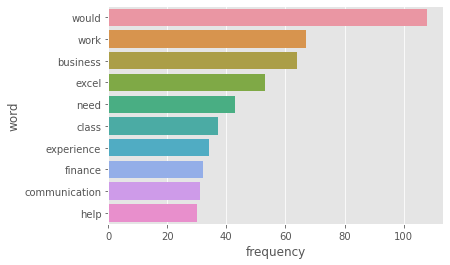

In [46]:
sns.barplot(x='frequency',y='word',data=df0_Acad14)

In [47]:
df0_Acad14_bi =Counter(ngrams(df0_2_A,2))
df0_Acad14_bi

Counter({('need', 'strong'): 1,
         ('strong', 'role'): 1,
         ('role', 'model'): 1,
         ('model', 'help'): 1,
         ('help', 'continue'): 1,
         ('continue', 'focusing'): 1,
         ('focusing', 'career'): 1,
         ('career', 'goal'): 3,
         ('goal', 'finance'): 1,
         ('finance', 'major'): 2,
         ('major', 'training'): 1,
         ('training', 'corporate'): 1,
         ('corporate', 'communication'): 1,
         ('communication', 'would'): 2,
         ('would', 'beneficial'): 4,
         ('beneficial', 'business'): 1,
         ('business', 'strategical'): 1,
         ('strategical', 'thinking'): 1,
         ('thinking', 'professional'): 1,
         ('professional', 'field'): 1,
         ('field', 'technical'): 1,
         ('technical', 'background'): 1,
         ('background', 'academic'): 1,
         ('academic', 'experience'): 2,
         ('experience', 'par'): 1,
         ('par', 'higher'): 1,
         ('higher', 'peer'): 1,
         ('pee

In [3]:
df0_Acad14_tri =Counter(ngrams(df0_2_A,3))
df0_Acad14_tri

NameError: name 'Counter' is not defined

In [52]:
df0_Acad14_tri1 = pd.DataFrame(df0_Acad14_tri.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

<AxesSubplot:xlabel='frequency', ylabel='word'>

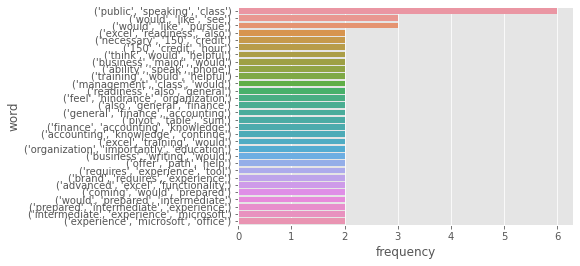

In [53]:
sns.barplot(x='frequency',y='word',data=df0_Acad14_tri1.head(30))

In [54]:
df0_Acad14_bi1 = pd.DataFrame(df0_Acad14_bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

<AxesSubplot:xlabel='frequency', ylabel='word'>

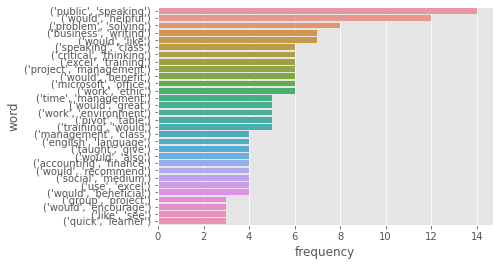

In [57]:
sns.barplot(x='frequency',y='word',data=df0_Acad14_bi1.head(30))

<AxesSubplot:xlabel='frequency', ylabel='word'>

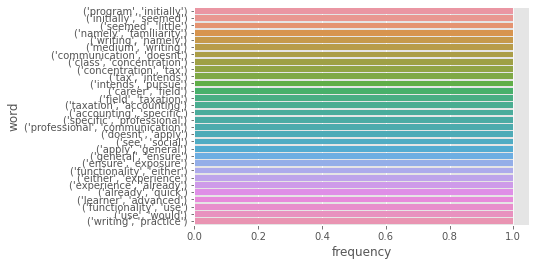

In [58]:
sns.barplot(x='frequency',y='word',data=df0_Acad14_bi1.tail(30))